# Default Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

In [2]:
df=pd.read_csv("Loan_Default.csv")

In [3]:
df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [4]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [5]:
df.shape

(148670, 34)

In [6]:
pd.set_option("display.max_columns", df.shape[-1])  #There are 34 feature in this dataset and DataFrame is not displaying all of them. To solve this we can set number of columns we want to display with pandas settings as shown in the cell below
df.head(5)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [7]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [8]:
df.columns= df.columns.str.lower()

In [9]:
df.columns 

Index(['id', 'year', 'loan_limit', 'gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'credit_worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'interest_rate_spread', 'upfront_charges', 'term', 'neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'secured_by', 'total_units',
       'income', 'credit_type', 'credit_score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'ltv', 'region', 'security_type',
       'status', 'dtir1'],
      dtype='object')

In [10]:
# we can drpo 'id' ,'loan_limit' , 'gender' ,'approv_in_adv' ,'loan_purpose' ,'open_credit' ,'business_or_commercial'  because they don't add any valiable information 
# we can drop 'year' as it includes only one year 2019

columns= ['id', 'year', 'loan_limit', 'gender', 'approv_in_adv','loan_purpose', 'credit_worthiness', 'open_credit','business_or_commercial','interest_rate_spread', 'upfront_charges', 'neg_ammortization','interest_only', 'lump_sum_payment','construction_type', 'occupancy_type', 'secured_by', 'total_units','credit_type', 'co-applicant_credit_type','submission_of_application', 'ltv', 'region', 'security_type']
df.drop(columns,axis=1, inplace =True)

In [11]:
df.columns

Index(['loan_type', 'loan_amount', 'rate_of_interest', 'term',
       'property_value', 'income', 'credit_score', 'age', 'status', 'dtir1'],
      dtype='object')

In [12]:
df.shape

(148670, 10)

In [13]:
pd.set_option("display.max_columns", df.shape[-1]) 
df.head()

,loan_type,loan_amount,rate_of_interest,term,property_value,income,credit_score,age,status,dtir1
0,type1,116500,NaN,360.0,118000.0,1740.0,758,25-34,1,45.0
1,type2,206500,NaN,360.0,NaN,4980.0,552,55-64,1,NaN
2,type1,406500,4.56,360.0,508000.0,9480.0,834,35-44,0,46.0
3,type1,456500,4.25,360.0,658000.0,11880.0,587,45-54,0,42.0
4,type1,696500,4.00,360.0,758000.0,10440.0,602,25-34,0,39.0


In [14]:
df.shape

(148670, 10)

In [15]:
df.duplicated().sum() ## Checking for duplicates 

6

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(148664, 10)

In [19]:
df.isna().sum() # Checking for Nan values 

loan_type               0
loan_amount             0
rate_of_interest    36437
term                   41
property_value      15096
income               9146
credit_score            0
age                   200
status                  0
dtir1               24115
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148664 entries, 0 to 148669
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_type         148664 non-null  object 
 1   loan_amount       148664 non-null  int64  
 2   rate_of_interest  112227 non-null  float64
 3   term              148623 non-null  float64
 4   property_value    133568 non-null  float64
 5   income            139518 non-null  float64
 6   credit_score      148664 non-null  int64  
 7   age               148464 non-null  object 
 8   status            148664 non-null  int64  
 9   dtir1             124549 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 12.5+ MB


### Filling Null values with mode

In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
df[['rate_of_interest', 'term','property_value','income','dtir1']] = imputer.fit_transform(df[['rate_of_interest', 'term','property_value','income','dtir1']])

In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df[['age']] = imputer.fit_transform(df[['age']])

In [23]:
df.isna().sum()

loan_type           0
loan_amount         0
rate_of_interest    0
term                0
property_value      0
income              0
credit_score        0
age                 0
status              0
dtir1               0
dtype: int64

# Some Characteristics of data & Visualization

In [24]:
df.columns

Index(['loan_type', 'loan_amount', 'rate_of_interest', 'term',
       'property_value', 'income', 'credit_score', 'age', 'status', 'dtir1'],
      dtype='object')

In [25]:
df['loan_type'].max()

'type3'

In [26]:
df['loan_type'].min()

'type1'

In [27]:
df['loan_amount'].max()

3576500

In [28]:
df['loan_amount'].min()

16500

In [29]:
df['age'].value_counts()

45-54    34919
35-44    32815
55-64    32533
65-74    20744
25-34    19141
>74       7175
<25       1337
Name: age, dtype: int64

In [30]:
df['rate_of_interest'].max()

8.0

In [31]:
df['rate_of_interest'].min()     #!!!

0.0

In [32]:
df['rate_of_interest'].mean()

4.045481969579513

In [33]:
df['status'].value_counts()

# large NO of applications are not eligable to loan 

0    112027
1     36637
Name: status, dtype: int64

In [34]:
df['property_value'].value_counts()

4.979002e+05    15096
3.080000e+05     2791
2.580000e+05     2763
3.580000e+05     2679
4.080000e+05     2537
                ...  
4.648000e+06        1
3.878000e+06        1
5.758000e+06        1
2.618000e+06        1
2.698000e+06        1
Name: property_value, Length: 386, dtype: int64

In [35]:
df['property_value'].max()

16508000.0

In [36]:
df['property_value'].min()

8000.0

In [37]:
df['loan_amount'].max()

3576500

In [38]:
mask=df['property_value']==df['property_value'].max()
df[mask]['loan_amount']

17114    2476500
Name: loan_amount, dtype: int64

In [39]:
mask = df['income']==df['income'].max()
df[mask]['status']

62237    1
Name: status, dtype: int64

In [40]:
mask = df['income']==df['income'].max()
df[mask]['rate_of_interest']

62237    4.045482
Name: rate_of_interest, dtype: float64

In [41]:
mask = df['income']==df['income'].min()           #!!!
df[mask]['status']

42        1
143       1
208       1
301       1
409       1
         ..
147632    1
147728    1
148163    1
148197    1
148349    1
Name: status, Length: 1259, dtype: int64

In [42]:
mask = df['income']==df['income'].min()
df[mask]['rate_of_interest'].value_counts()

4.045482    1251
4.125000       2
3.625000       1
2.990000       1
4.750000       1
0.000000       1
3.875000       1
4.250000       1
Name: rate_of_interest, dtype: int64

### We descoverd that there is a problem in the data must be handeled 

In [43]:
df['income'].value_counts()

6957.392164      9146
0.000000         1259
3600.000000      1250
4200.000000      1243
4800.000000      1191
                 ... 
45300.000000        1
154440.000000       1
137760.000000       1
145560.000000       1
79920.000000        1
Name: income, Length: 1002, dtype: int64

In [44]:
df['income'].mean()

6957.392164451898

In [45]:
mask=df['income']<2000

In [46]:
mask.value_counts()            # there is income less than 2000

False    140706
True       7958
Name: income, dtype: int64

In [47]:
df['income']=df['income'].apply(lambda x: x if x not in mask else df['income'].mean())

In [48]:
mask=df['income']<2000
mask.value_counts()

False    148664
Name: income, dtype: int64

In [49]:
df['income'].min()

6957.392164451898

In [50]:
df['rate_of_interest'].value_counts()

4.045482    36437
3.990000    14454
3.625000     8799
3.875000     8592
3.750000     8473
            ...  
4.700000        1
8.000000        1
7.750000        1
5.300000        1
2.700000        1
Name: rate_of_interest, Length: 132, dtype: int64

In [51]:
df['rate_of_interest'].min()      # interest rate shall not be zero

0.0

In [52]:
df['rate_of_interest'].mean()

4.045481969579513

In [53]:
mask=df['rate_of_interest']==0
mask.value_counts()

False    148663
True          1
Name: rate_of_interest, dtype: int64

In [54]:
df['rate_of_interest']=df['rate_of_interest'].apply(lambda x: x if x not in mask else df['rate_of_interest'].mean())

In [55]:
df['rate_of_interest'].min()

2.125

<AxesSubplot: xlabel='loan_type', ylabel='count'>

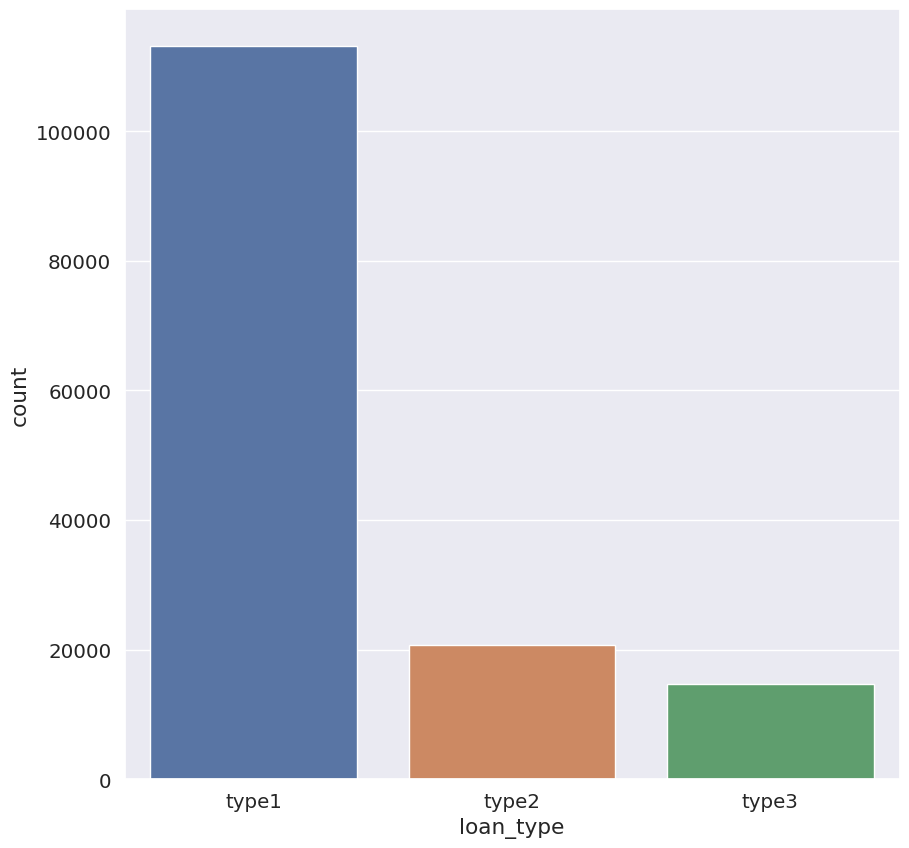

In [56]:
sns.countplot(data=df , x='loan_type')

<AxesSubplot: xlabel='status', ylabel='count'>

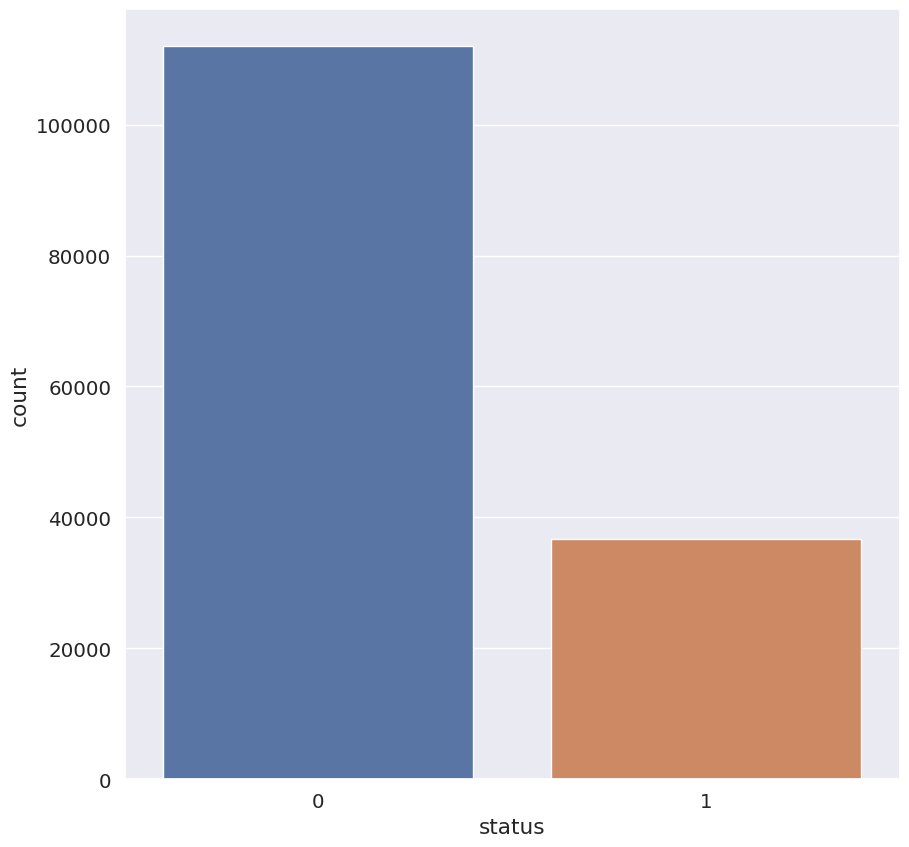

In [57]:
sns.countplot(data=df , x='status')

<AxesSubplot: xlabel='age', ylabel='count'>

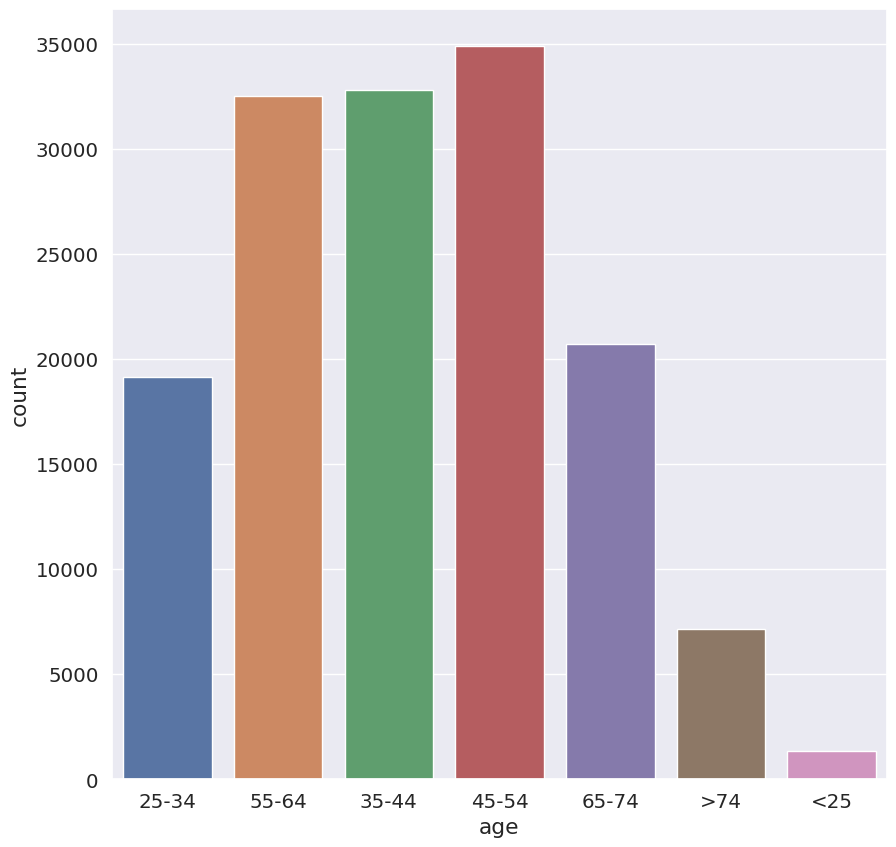

In [58]:
sns.countplot(data=df , x='age')

<AxesSubplot: xlabel='rate_of_interest', ylabel='income'>

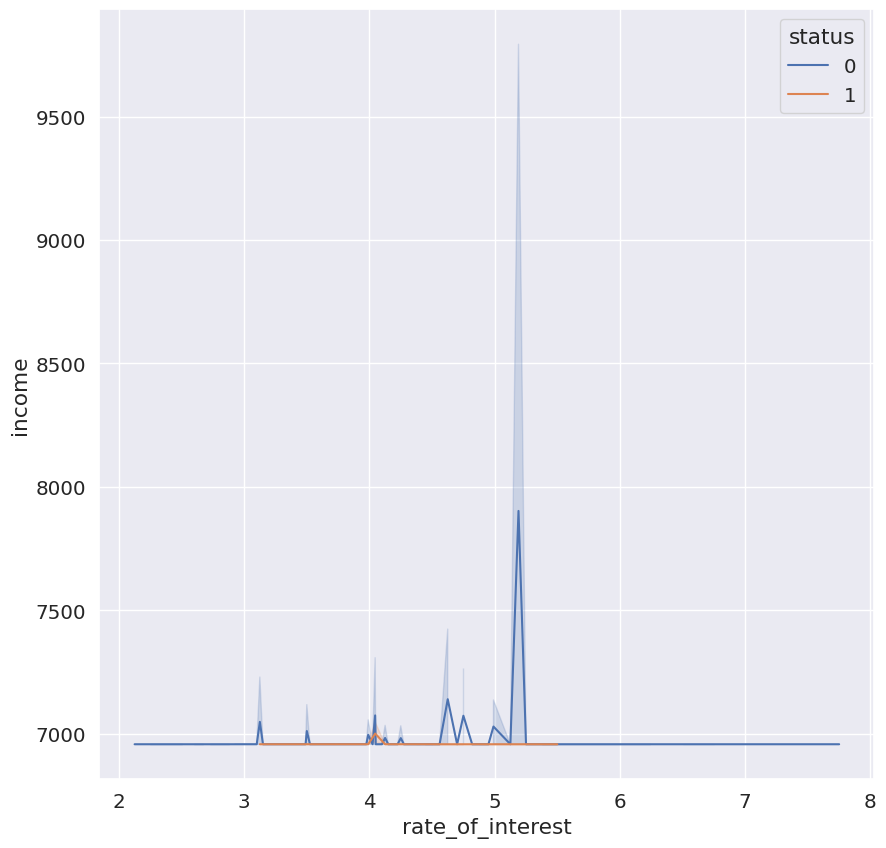

In [59]:
sns.lineplot(data=df, x="rate_of_interest", y="income", hue="status")

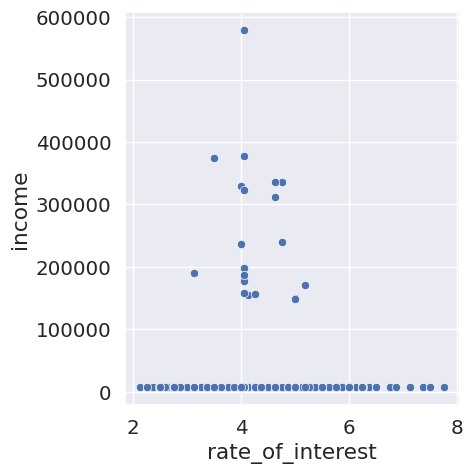

In [60]:
sns.relplot(x ="rate_of_interest", y ="income",data = df)

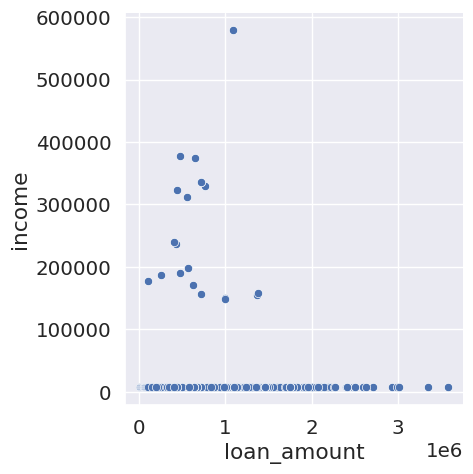

In [61]:
sns.relplot(x ="loan_amount", y ="income",data = df)

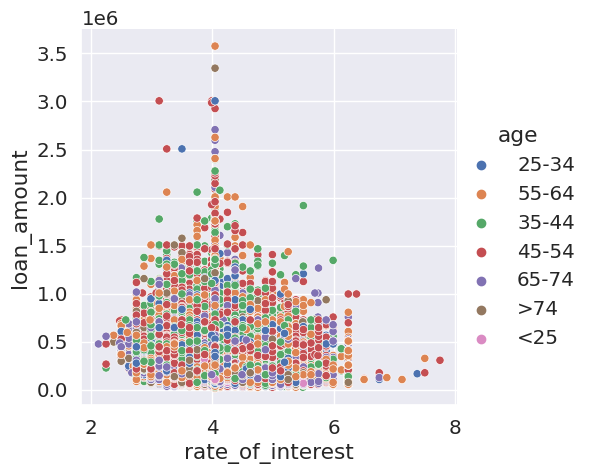

In [62]:
sns.relplot(x ="rate_of_interest", y ="loan_amount", hue='age' ,data = df)

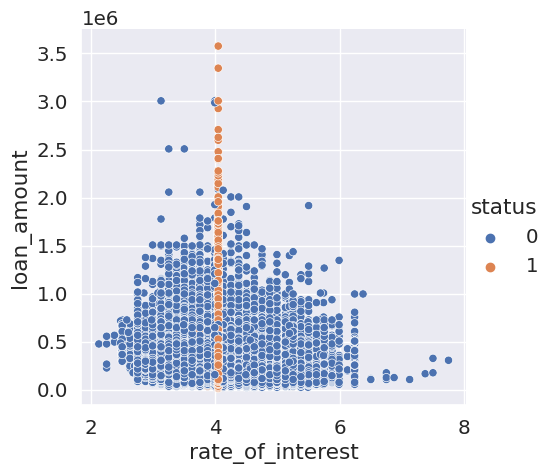

In [63]:
sns.relplot(x ="rate_of_interest", y ="loan_amount", hue='status' ,data = df)

/tmp/ipykernel_50/258400812.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amount'])


<AxesSubplot: xlabel='loan_amount', ylabel='Density'>

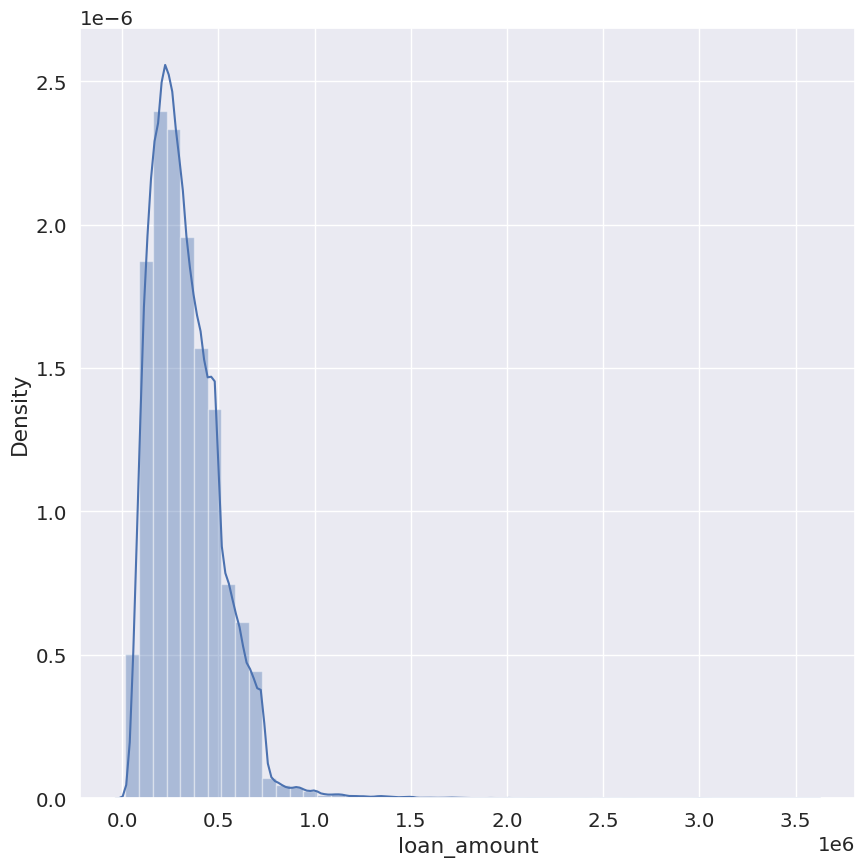

In [64]:
sns.distplot(df['loan_amount'])

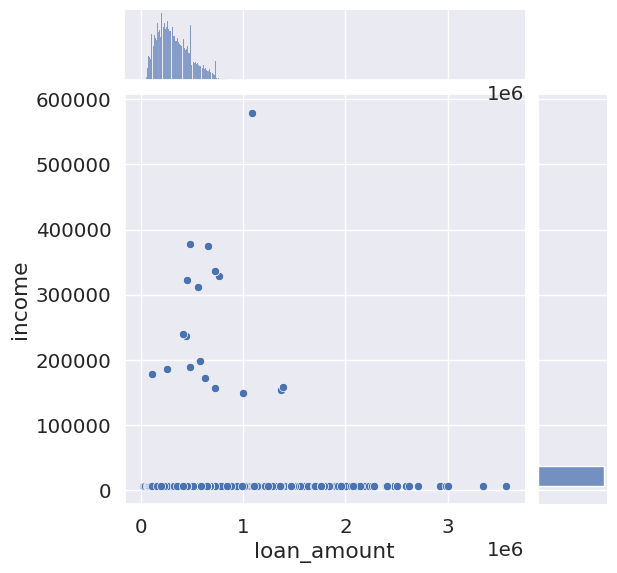

In [65]:
sns.jointplot(data=df,x='loan_amount' , y = 'income')

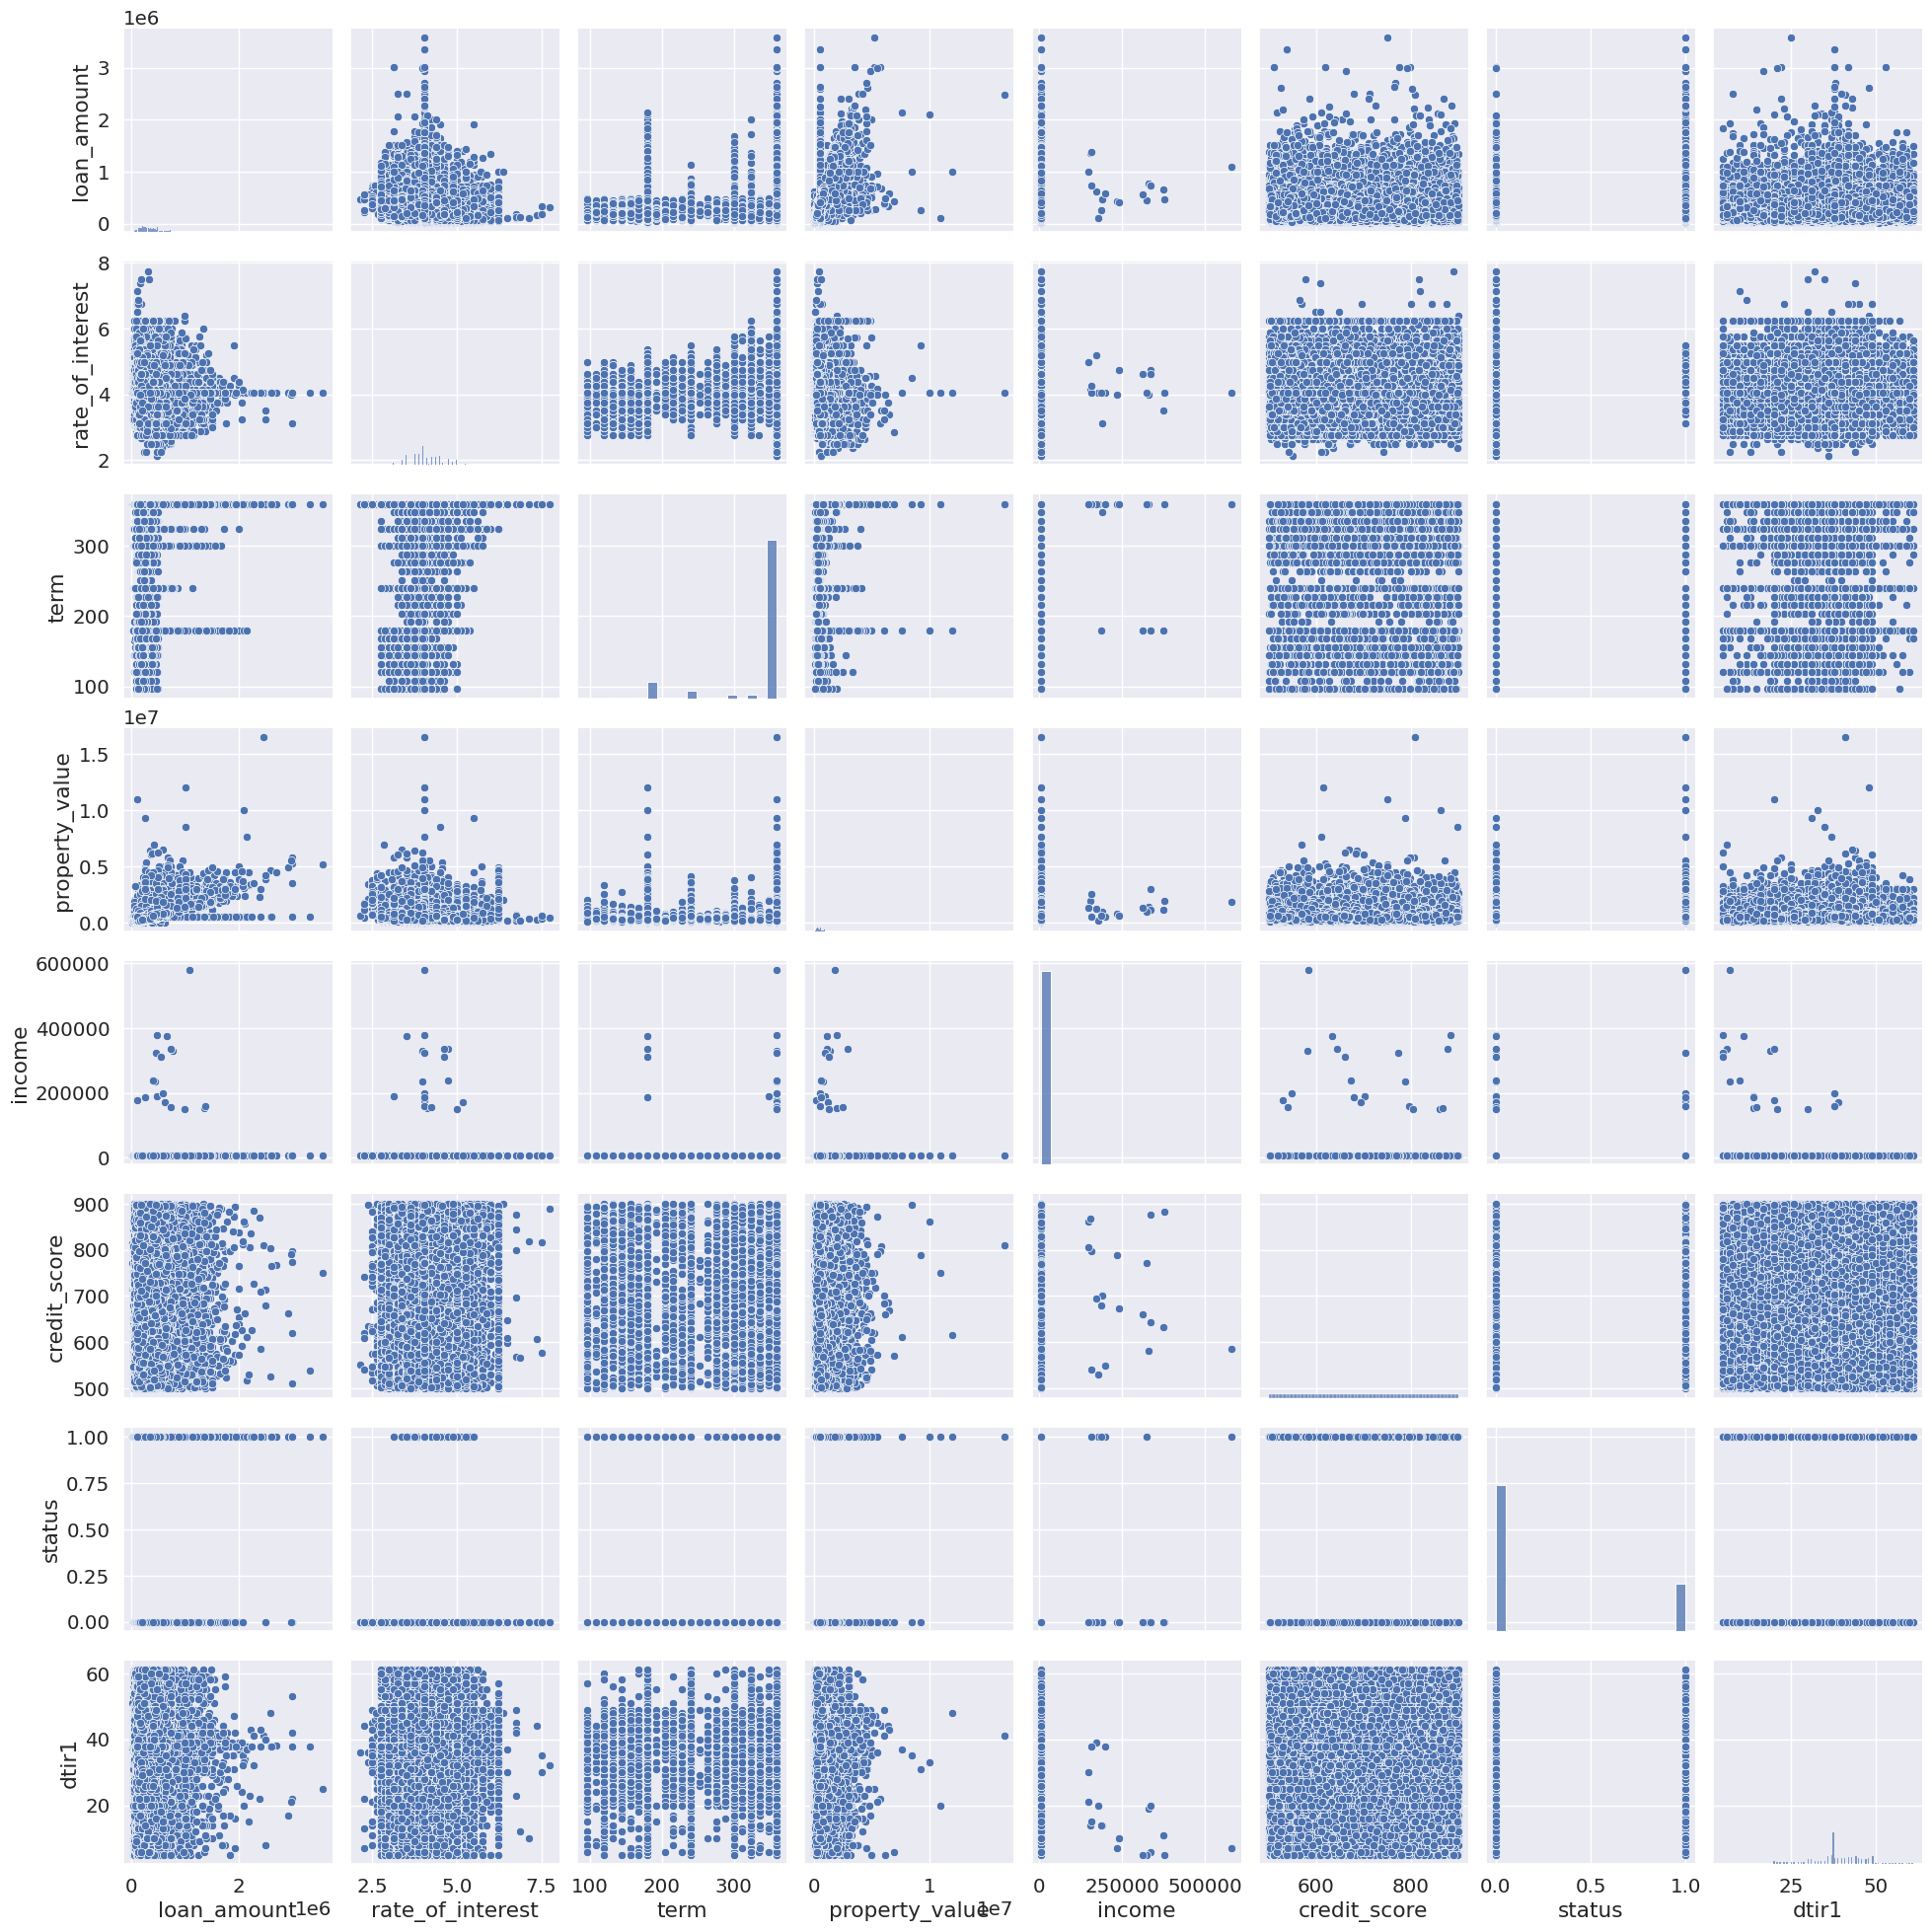

In [66]:
sns.pairplot(df)

<AxesSubplot: xlabel='status', ylabel='loan_amount'>

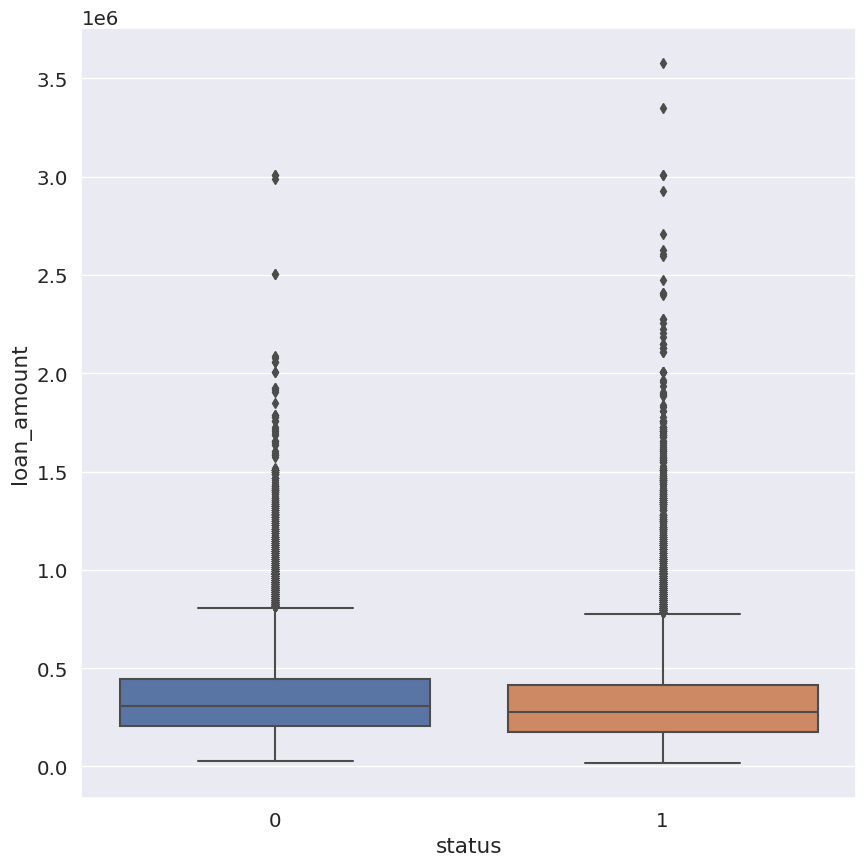

In [67]:
sns.boxplot(data=df , x='status' , y ='loan_amount')

<AxesSubplot: xlabel='status', ylabel='term'>

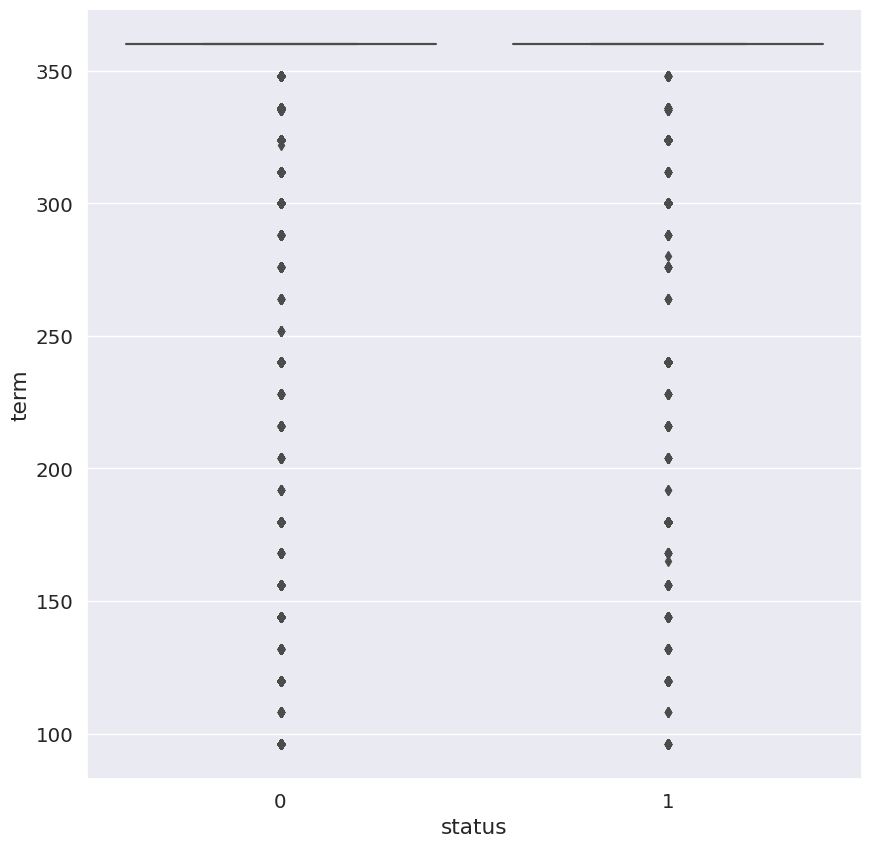

In [68]:
sns.boxplot(data=df , x='status' , y ='term')

<AxesSubplot: xlabel='status', ylabel='income'>

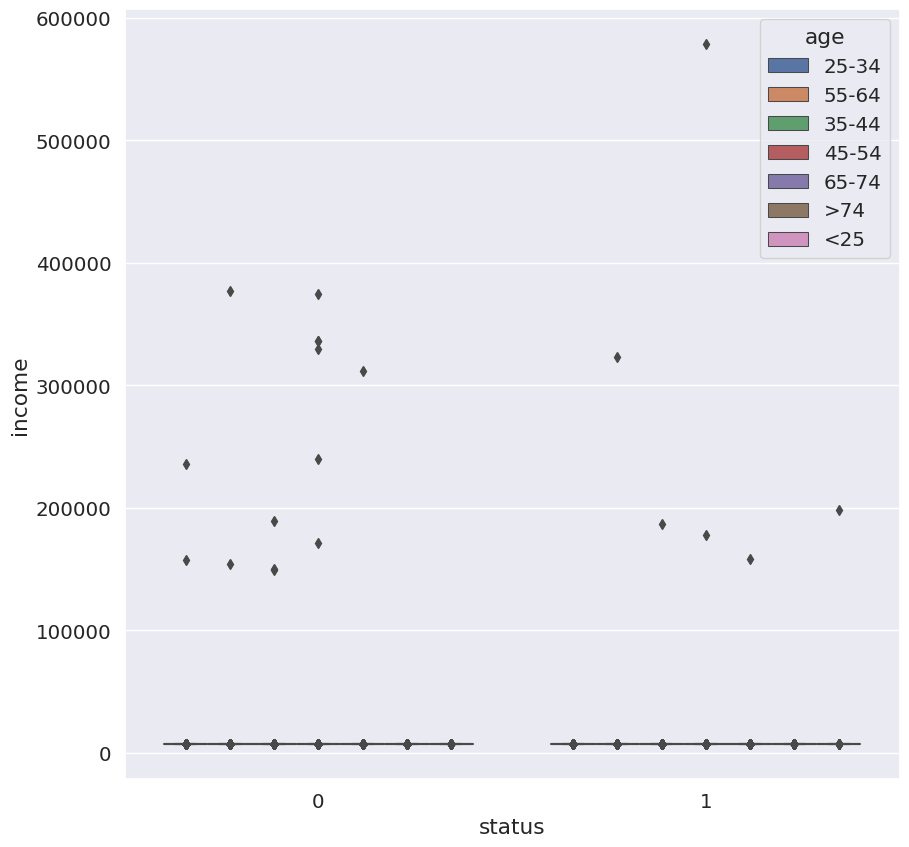

In [69]:
sns.boxplot(data=df , x='status' , y ='income' , hue='age')

<AxesSubplot: xlabel='age', ylabel='credit_score'>

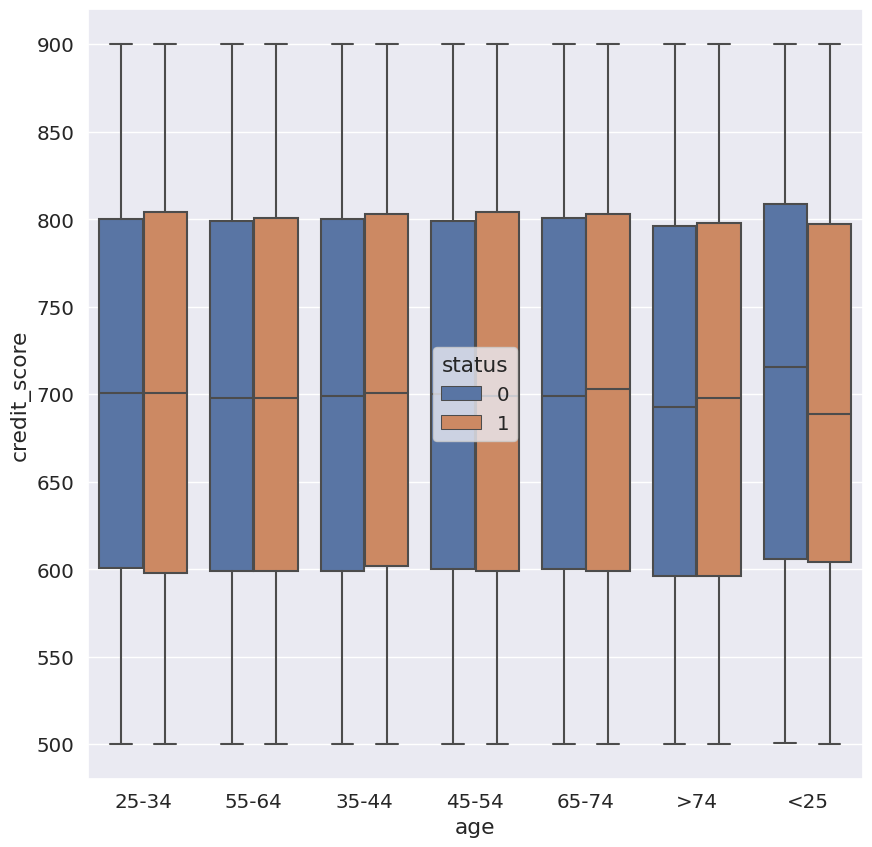

In [70]:
sns.boxplot(data=df , x='age' , y ='credit_score' , hue='status')

/tmp/ipykernel_50/2802813450.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() , annot = True)


<AxesSubplot: >

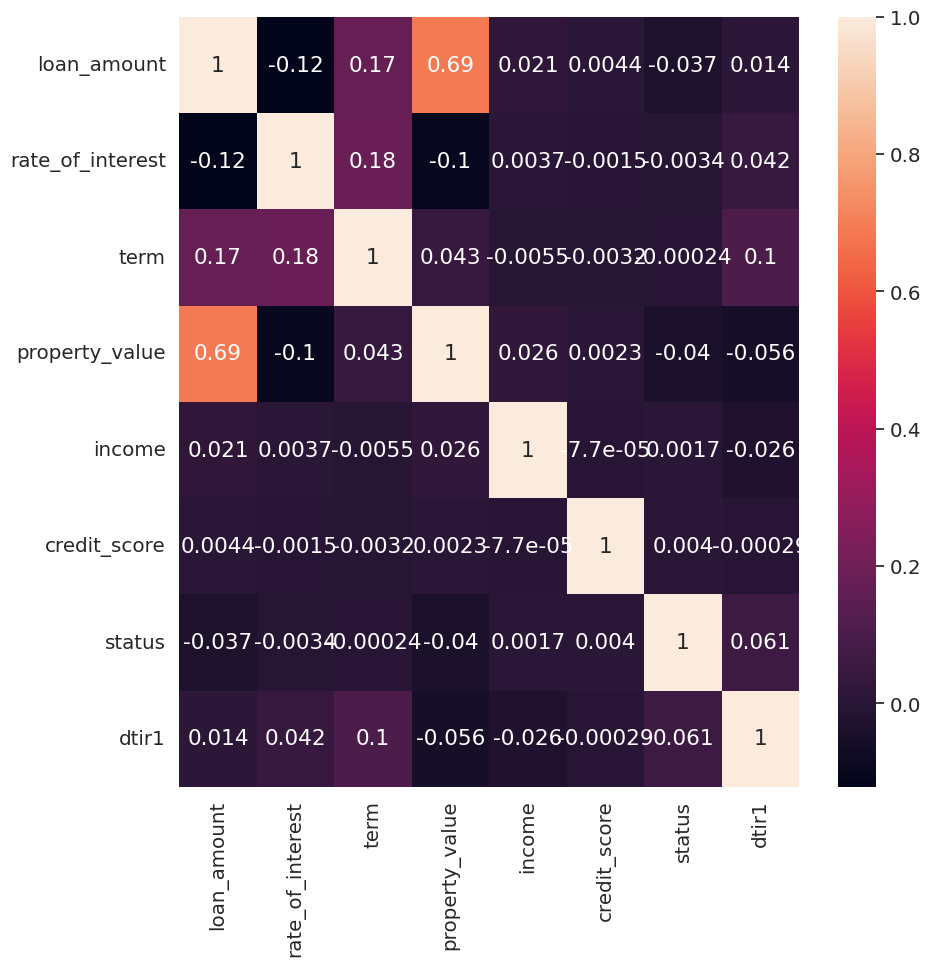

In [71]:
sns.heatmap(df.corr() , annot = True)

# Dealing with non numerical values 

### All data must be numerical to be used in the machine learning model

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148664 entries, 0 to 148669
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_type         148664 non-null  object 
 1   loan_amount       148664 non-null  int64  
 2   rate_of_interest  148664 non-null  float64
 3   term              148664 non-null  float64
 4   property_value    148664 non-null  float64
 5   income            148664 non-null  float64
 6   credit_score      148664 non-null  int64  
 7   age               148664 non-null  object 
 8   status            148664 non-null  int64  
 9   dtir1             148664 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 16.5+ MB


In [73]:
df['new'] = ((df['loan_amount']/ df['property_value'])*df['rate_of_interest'])
df['new1']=df['loan_amount']/df['credit_score']

In [74]:
df = pd.get_dummies(df, columns=['loan_type','age'], drop_first=True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148664 entries, 0 to 148669
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_amount       148664 non-null  int64  
 1   rate_of_interest  148664 non-null  float64
 2   term              148664 non-null  float64
 3   property_value    148664 non-null  float64
 4   income            148664 non-null  float64
 5   credit_score      148664 non-null  int64  
 6   status            148664 non-null  int64  
 7   dtir1             148664 non-null  float64
 8   new               148664 non-null  float64
 9   new1              148664 non-null  float64
 10  loan_type_type2   148664 non-null  uint8  
 11  loan_type_type3   148664 non-null  uint8  
 12  age_35-44         148664 non-null  uint8  
 13  age_45-54         148664 non-null  uint8  
 14  age_55-64         148664 non-null  uint8  
 15  age_65-74         148664 non-null  uint8  
 16  age_<25           14

In [76]:
pd.set_option("display.max_columns", df.shape[-1]) 
df.head()

,loan_amount,rate_of_interest,term,property_value,income,credit_score,status,dtir1,new,new1,loan_type_type2,loan_type_type3,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
0,116500,4.045482,360.0,118000.000000,6957.392164,758,1,45.000000,3.994056,153.693931,0,0,0,0,0,0,0,0
1,206500,4.045482,360.0,497900.200647,6957.392164,552,1,37.732932,1.677830,374.094203,1,0,0,0,1,0,0,0
2,406500,4.560000,360.0,508000.000000,6957.392164,834,0,46.000000,3.648898,487.410072,0,0,1,0,0,0,0,0
3,456500,4.250000,360.0,658000.000000,6957.392164,587,0,42.000000,2.948518,777.683135,0,0,0,1,0,0,0,0
4,696500,4.045482,360.0,758000.000000,6957.392164,602,0,39.000000,3.717254,1156.976744,0,0,0,0,0,0,0,0


In [77]:
df.shape

(148664, 18)

# Data Split to Train and Test Sets

In [78]:
x = df.drop('status', axis=1)
y = df['status']

In [79]:
x

,loan_amount,rate_of_interest,term,property_value,income,credit_score,dtir1,new,new1,loan_type_type2,loan_type_type3,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
0,116500,4.045482,360.0,118000.000000,6957.392164,758,45.000000,3.994056,153.693931,0,0,0,0,0,0,0,0
1,206500,4.045482,360.0,497900.200647,6957.392164,552,37.732932,1.677830,374.094203,1,0,0,0,1,0,0,0
2,406500,4.560000,360.0,508000.000000,6957.392164,834,46.000000,3.648898,487.410072,0,0,1,0,0,0,0,0
3,456500,4.250000,360.0,658000.000000,6957.392164,587,42.000000,2.948518,777.683135,0,0,0,1,0,0,0,0
4,696500,4.045482,360.0,758000.000000,6957.392164,602,39.000000,3.717254,1156.976744,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,436500,3.125000,180.0,608000.000000,6957.392164,659,48.000000,2.243524,662.367223,0,0,0,0,1,0,0,0
148666,586500,5.190000,360.0,788000.000000,6957.392164,569,15.000000,3.862862,1030.755712,0,0,0,0,0,0,0,0
148667,446500,3.125000,180.0,728000.000000,6957.392164,702,49.000000,1.916638,636.039886,0,0,0,1,0,0,0,0
148668,196500,3.500000,180.0,278000.000000,6957.392164,737,29.000000,2.473921,266.621438,0,0,0,0,1,0,0,0


In [80]:
y

0         1
1         1
2         0
3         0
4         0
         ..
148665    0
148666    0
148667    0
148668    0
148669    0
Name: status, Length: 148664, dtype: int64

In [81]:
x.shape

(148664, 17)

In [82]:
y.shape

(148664,)

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [84]:
x_train

,loan_amount,rate_of_interest,term,property_value,income,credit_score,dtir1,new,new1,loan_type_type2,loan_type_type3,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
115121,396500,3.750000,360.0,658000.000000,6957.392164,651,35.000000,2.259688,609.062980,0,0,0,0,1,0,0,0
111361,216500,3.990000,180.0,278000.000000,6957.392164,880,45.000000,3.107320,246.022727,0,0,0,0,0,1,0,0
131691,426500,4.045482,360.0,497900.200647,6957.392164,868,37.732932,3.465349,491.359447,0,0,0,1,0,0,0,0
98528,46500,4.125000,360.0,98000.000000,6957.392164,721,22.000000,1.957270,64.493759,1,0,0,1,0,0,0,0
112615,336500,4.500000,360.0,408000.000000,6957.392164,570,44.000000,3.711397,590.350877,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138277,456500,3.875000,360.0,568000.000000,6957.392164,754,44.000000,3.114327,605.437666,0,0,0,0,1,0,0,0
1602,436500,2.875000,360.0,468000.000000,6957.392164,556,41.000000,2.681490,785.071942,1,0,0,1,0,0,0,0
90519,406500,3.750000,180.0,538000.000000,6957.392164,742,44.000000,2.833411,547.843666,0,0,0,1,0,0,0,0
147020,106500,4.045482,360.0,108000.000000,6957.392164,693,41.000000,3.989295,153.679654,1,0,0,0,0,0,0,1


In [85]:
x_train.shape

(118931, 17)

In [86]:
x_test

,loan_amount,rate_of_interest,term,property_value,income,credit_score,dtir1,new,new1,loan_type_type2,loan_type_type3,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
129591,316500,4.500000,360.0,398000.000000,6957.392164,516,48.000000,3.578518,613.372093,0,0,0,0,1,0,0,0
33462,426500,4.500000,360.0,538000.000000,6957.392164,874,36.000000,3.567379,487.986270,0,0,0,1,0,0,0,0
103825,486500,4.560000,360.0,538000.000000,6957.392164,867,21.000000,4.123494,561.130334,0,0,1,0,0,0,0,0
135004,86500,4.500000,360.0,108000.000000,6957.392164,770,36.000000,3.604167,112.337662,0,0,0,0,1,0,0,0
16426,246500,4.045482,360.0,497900.200647,6957.392164,622,37.732932,2.002834,396.302251,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147832,486500,5.625000,360.0,618000.000000,6957.392164,750,39.000000,4.428095,648.666667,0,0,0,1,0,0,0,0
6812,316500,4.045482,360.0,398000.000000,6957.392164,834,45.000000,3.217073,379.496403,0,0,0,1,0,0,0,0
47368,276500,4.250000,240.0,378000.000000,6957.392164,747,22.000000,3.108796,370.147256,0,0,0,1,0,0,0,0
40722,296500,4.045482,180.0,518000.000000,6957.392164,539,31.000000,2.315609,550.092764,0,0,1,0,0,0,0,0


In [87]:
x_test.shape

(29733, 17)

In [88]:
y_train

115121    0
111361    0
131691    1
98528     0
112615    0
         ..
138277    0
1602      0
90519     0
147020    1
21008     0
Name: status, Length: 118931, dtype: int64

In [89]:
x_train.shape

(118931, 17)

In [90]:
y_train.shape

(118931,)

In [91]:
y_train.value_counts()

0    89732
1    29199
Name: status, dtype: int64

In [92]:
sm = SMOTE()
x_train, y_train = sm.fit_resample(x_train, y_train)

In [93]:
y_train.value_counts()

0    89732
1    89732
Name: status, dtype: int64

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

[[21795   500]
 [  428  7010]]
0.9687888877678
0.937918116135938
0.9600155484335454
0.933422103861518
0.9424576499058887


In [95]:
print(f'training accuaracy: {model.score(x_train,y_train)}')
print(f'testing accuaracy: {model.score(x_test,y_test)}')

training accuaracy: 1.0
testing accuaracy: 0.9687888877678


In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model=RandomForestClassifier(n_estimators=1)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

print(f1_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

[[21657   638]
 [  490  6948]]
0.9620623549591363
0.9249201277955271
0.9527528970746645
0.9158977063010809
0.9341220758268352


In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model=LogisticRegression(random_state=1234)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f'training accuaracy: {model.score(x_train,y_train)}')
print(f'testing accuaracy: {model.score(x_test,y_test)}')

[[10759 11536]
 [ 3589  3849]]
0.49130595634480206
0.3372913289225781
0.5000261924531121
0.2501787455313617
0.5174778166173702
training accuaracy: 0.5000167164445237
testing accuaracy: 0.49130595634480206


In [98]:
x_train.columns[x_train.columns.str.contains("[\[\]<]")]
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179464 entries, 0 to 179463
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_amount       179464 non-null  int64  
 1   rate_of_interest  179464 non-null  float64
 2   term              179464 non-null  float64
 3   property_value    179464 non-null  float64
 4   income            179464 non-null  float64
 5   credit_score      179464 non-null  int64  
 6   dtir1             179464 non-null  float64
 7   new               179464 non-null  float64
 8   new1              179464 non-null  float64
 9   loan_type_type2   179464 non-null  uint8  
 10  loan_type_type3   179464 non-null  uint8  
 11  age_35-44         179464 non-null  uint8  
 12  age_45-54         179464 non-null  uint8  
 13  age_55-64         179464 non-null  uint8  
 14  age_65-74         179464 non-null  uint8  
 15  age_<25           179464 non-null  uint8  
 16  age_>74           17

In [99]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model=KNeighborsClassifier(n_neighbors=200)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

[[19935  2360]
 [ 3420  4018]]
0.805603201829617
0.5816444701795019
0.7171728239384126
0.629978049545312
0.5401989782199516


In [100]:
columns= ['age_<25','age_>74']
x_train.drop(columns,axis=1, inplace =True)

x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179464 entries, 0 to 179463
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_amount       179464 non-null  int64  
 1   rate_of_interest  179464 non-null  float64
 2   term              179464 non-null  float64
 3   property_value    179464 non-null  float64
 4   income            179464 non-null  float64
 5   credit_score      179464 non-null  int64  
 6   dtir1             179464 non-null  float64
 7   new               179464 non-null  float64
 8   new1              179464 non-null  float64
 9   loan_type_type2   179464 non-null  uint8  
 10  loan_type_type3   179464 non-null  uint8  
 11  age_35-44         179464 non-null  uint8  
 12  age_45-54         179464 non-null  uint8  
 13  age_55-64         179464 non-null  uint8  
 14  age_65-74         179464 non-null  uint8  
dtypes: float64(7), int64(2), uint8(6)
memory usage: 13.3 MB


In [101]:
x_test.info()
columns= ['age_<25','age_>74']
x_test.drop(columns,axis=1, inplace =True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29733 entries, 129591 to 136136
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_amount       29733 non-null  int64  
 1   rate_of_interest  29733 non-null  float64
 2   term              29733 non-null  float64
 3   property_value    29733 non-null  float64
 4   income            29733 non-null  float64
 5   credit_score      29733 non-null  int64  
 6   dtir1             29733 non-null  float64
 7   new               29733 non-null  float64
 8   new1              29733 non-null  float64
 9   loan_type_type2   29733 non-null  uint8  
 10  loan_type_type3   29733 non-null  uint8  
 11  age_35-44         29733 non-null  uint8  
 12  age_45-54         29733 non-null  uint8  
 13  age_55-64         29733 non-null  uint8  
 14  age_65-74         29733 non-null  uint8  
 15  age_<25           29733 non-null  uint8  
 16  age_>74           29733 non-null  

In [102]:
import xgboost as xgb
x_train.columns[x_train.columns.str.contains("[\[\]<]")]
# specify hyperparameters


xgb_classifier = xgb.XGBClassifier(max_depth=20)
xgb_classifier.fit(x_train,y_train)
y_pred = xgb_classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))




[[21813   482]
 [  179  7259]]
0.9777688090673662
0.9564529942683971
0.9771575969179559
0.9377341428755974
0.9759343909653132


In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(random_state=1234), 
               xgb.XGBClassifier(max_depth=20),
               KNeighborsClassifier(), 
               DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(n_estimators=2)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(x_train, y_train)
    yproba = model.predict_proba(x_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

/tmp/ipykernel_50/1745009378.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
/tmp/ipykernel_50/1745009378.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
/tmp/ipykernel_50/1745009378.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
/tmp/ipykernel_50/1745009378.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
/tmp/ipykernel_50/17

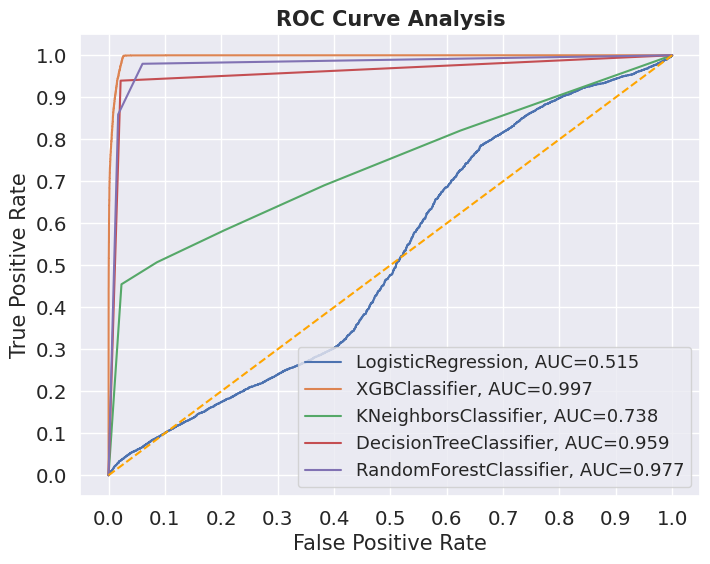

In [104]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()